# Name Based Gender Classification Using NLP and Python

### Import Libraries

In [339]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

### Load the dataset

In [433]:
## dataset1 = pd.read_csv("C:\\Users\\admin\\Desktop\\Python_anaconda\\Projects\\Name Gender\\names(1880-2021).txt", sep =",")
dataset = pd.read_csv("C:\\Users\\admin\\Desktop\\Python_anaconda\\Projects\\Name Gender\\Gender_Data.csv")

In [434]:
## dataset1.head()

In [435]:
dataset.head()

,Name,Gender
0,Aaban,0
1,Aabharan,0
2,Aabhas,0
3,Aabhat,0
4,Aabheer,0


### Exploratory Data Analysis

In [675]:
dataset.columns

Index(['Name', 'Gender'], dtype='object')

In [676]:
## print(dataset1.dtypes)
## print("\n\n")
print(dataset.columns)
print(dataset.dtypes)

Index(['Name', 'Gender'], dtype='object')
Name      object
Gender    object
dtype: object


In [437]:
dataset['Gender'] = dataset['Gender'].replace({0:"M",1:"F"})

In [438]:
dataset = dataset.loc[:,['Name', 'Gender']]

In [439]:
## data = pd.concat([dataset1, dataset2])

In [440]:
dataset.shape

(53982, 2)

We can see that there are 53982 Indian names in total

In [441]:
dataset.dtypes

Name      object
Gender    object
dtype: object

In [442]:
dataset.isnull().sum()

Name      0
Gender    0
dtype: int64

It is clear from the above output that there are no missing values in the dataset being used

In [443]:
len(dataset['Name'].unique())

53925

In [444]:
dataset['Gender'].unique()

array(['M', 'F'], dtype=object)

In [445]:
dataset['Gender'].value_counts()

M    29014
F    24968
Name: Gender, dtype: int64

Let us create a plot to see how many male and female names are present in the dataset

([<matplotlib.axis.XTick at 0x2c99daec820>,
 [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

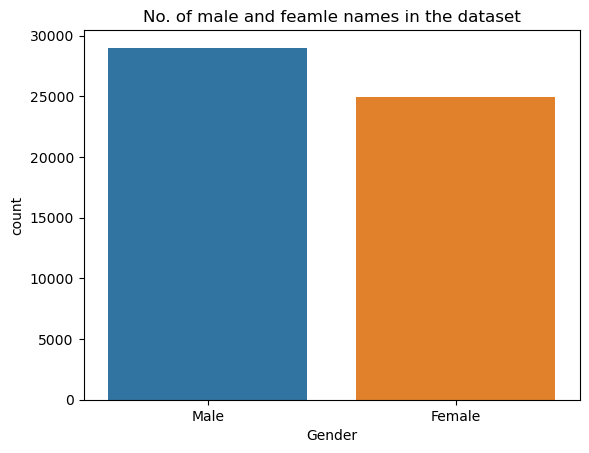

In [677]:
sns.countplot(x='Gender',data = dataset)
plt.title('No. of male and feamle names in the dataset')
plt.xticks([0,1],('Male','Female'))

It is evident that there is no class imbalance in the dataset 
that is there is no major difference in the no. of names of men and women

In [447]:
dataset['Name'].value_counts()[::-1][:5]

Zuvaka       1
Raghubeer    1
Raghubir     1
Raghu        1
Raghbir      1
Name: Name, dtype: int64

This snippet shows the names which occure the least number of times in the dataset

Next, we let us look into how many names start with A, B...Z and their percentage as compared to the entire dataset

In [679]:
alphabets= ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
total_percent=0
total_count = 0
startletter_count = {}
for i in alphabets:
    print('Number of names starting with {} are '.format(i),len(dataset[dataset['Name'].str.startswith(i)]))
    startletter_count[i] = len(dataset[dataset['Name'].str.startswith(i)])
    print('Percent: ',len(dataset[dataset['Name'].str.contains(i)])/len(dataset['Name'])*100)
    print('\n')
    total_count = total_count + len(dataset[dataset['Name'].str.contains(i)])
    total_percent=total_percent+(len(dataset[dataset['Name'].str.contains(i)])/len(dataset['Name'])*100)
print('Total names = ', total_count)
print("Total percentage = ", total_percent)

Number of names starting with A are  6476
Percent:  12.004001333777927


Number of names starting with B are  1698
Percent:  3.1454929420918085


Number of names starting with C are  1033
Percent:  1.9228631766144269


Number of names starting with D are  2964
Percent:  5.492571597940054


Number of names starting with E are  685
Percent:  1.268941499018191


Number of names starting with F are  137
Percent:  0.25378829980363826


Number of names starting with G are  1430
Percent:  2.6508836278759587


Number of names starting with H are  1648
Percent:  3.054721944351821


Number of names starting with I are  897
Percent:  1.6635174687858916


Number of names starting with J are  2501
Percent:  4.6330258234226225


Number of names starting with K are  4226
Percent:  7.830387907080137


Number of names starting with L are  1350
Percent:  2.500833611203735


Number of names starting with M are  3849
Percent:  7.133859434626356


Number of names starting with N are  3551
Percent:  6.57997

In [680]:
print(startletter_count)

{'A': 6476, 'B': 1698, 'C': 1033, 'D': 2964, 'E': 685, 'F': 137, 'G': 1430, 'H': 1648, 'I': 897, 'J': 2501, 'K': 4226, 'L': 1350, 'M': 3849, 'N': 3551, 'O': 209, 'P': 3285, 'Q': 16, 'R': 3353, 'S': 5137, 'T': 2909, 'U': 640, 'V': 4102, 'W': 95, 'X': 1, 'Y': 1644, 'Z': 125}


Text(0.5, 1.0, 'Number of names starting with each letter')

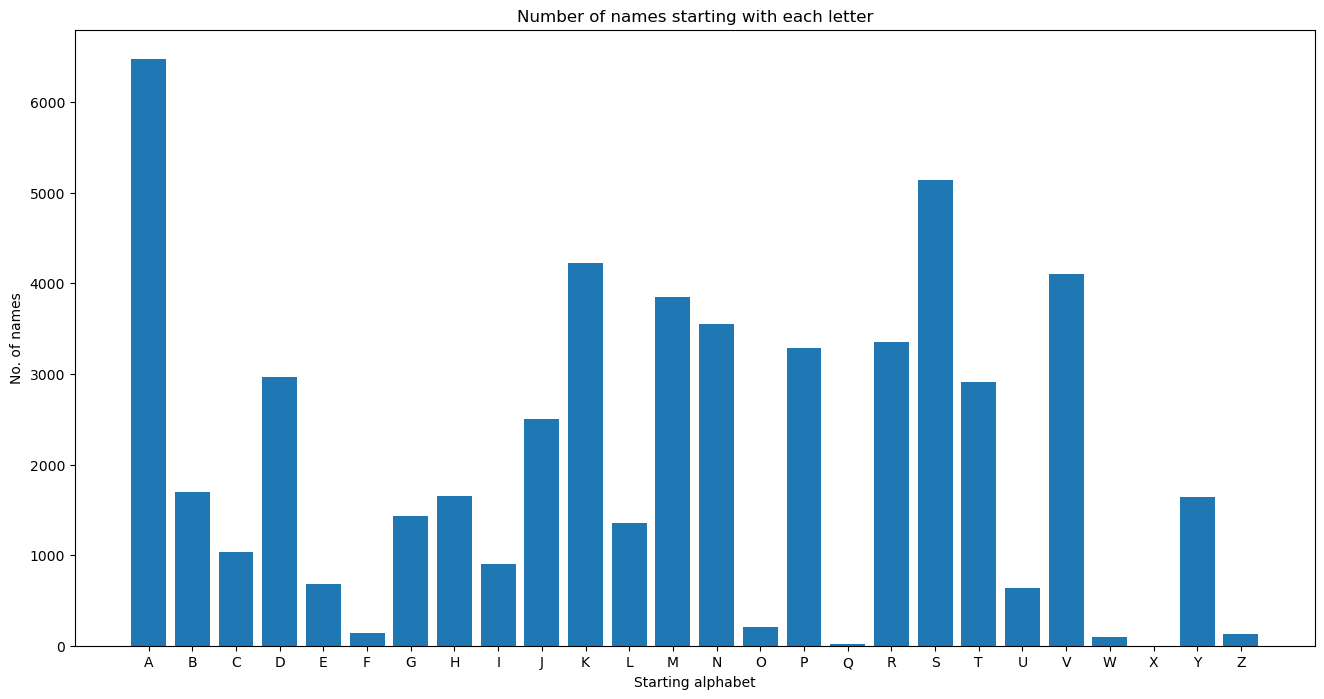

In [449]:
plt.figure(figsize = (16,8))
plt.bar(startletter_count.keys(),startletter_count.values())
plt.xlabel('Starting alphabet')
plt.ylabel('No. of names')
plt.title('Number of names starting with each letter')

Top 5 alphabets with which most of the namesstart are:

In [450]:
# most common starting letter
print('The 5 most name starting letters are : ', *sorted(startletter_count.items(), key=lambda item: item[1])[-5:][::-1])

The 5 most name starting letters are :  ('A', 6476) ('S', 5137) ('K', 4226) ('V', 4102) ('M', 3849)


Most rarest in the dataset

In [451]:
# the most rarest indian name
print(dataset[dataset['Name'].str.contains('X')])

           Name Gender
53082  Xiyamila      F


Now, let us see how many names end with the alphabets a,b...z

In [452]:
small_alphabets = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','x','y','z']
endletter_count ={}
for i in small_alphabets:
    endletter_count[i]=len(dataset[dataset['Name'].str.endswith(i)])
print(endletter_count)

{'a': 16311, 'b': 81, 'c': 18, 'd': 363, 'e': 1008, 'f': 14, 'g': 126, 'h': 4551, 'i': 8863, 'j': 573, 'k': 747, 'l': 1187, 'm': 666, 'n': 13513, 'o': 103, 'p': 241, 'q': 10, 'r': 1584, 's': 458, 't': 1088, 'u': 858, 'v': 438, 'x': 7, 'y': 1135, 'z': 31}


Text(0.5, 1.0, 'Number of names ending with each letter')

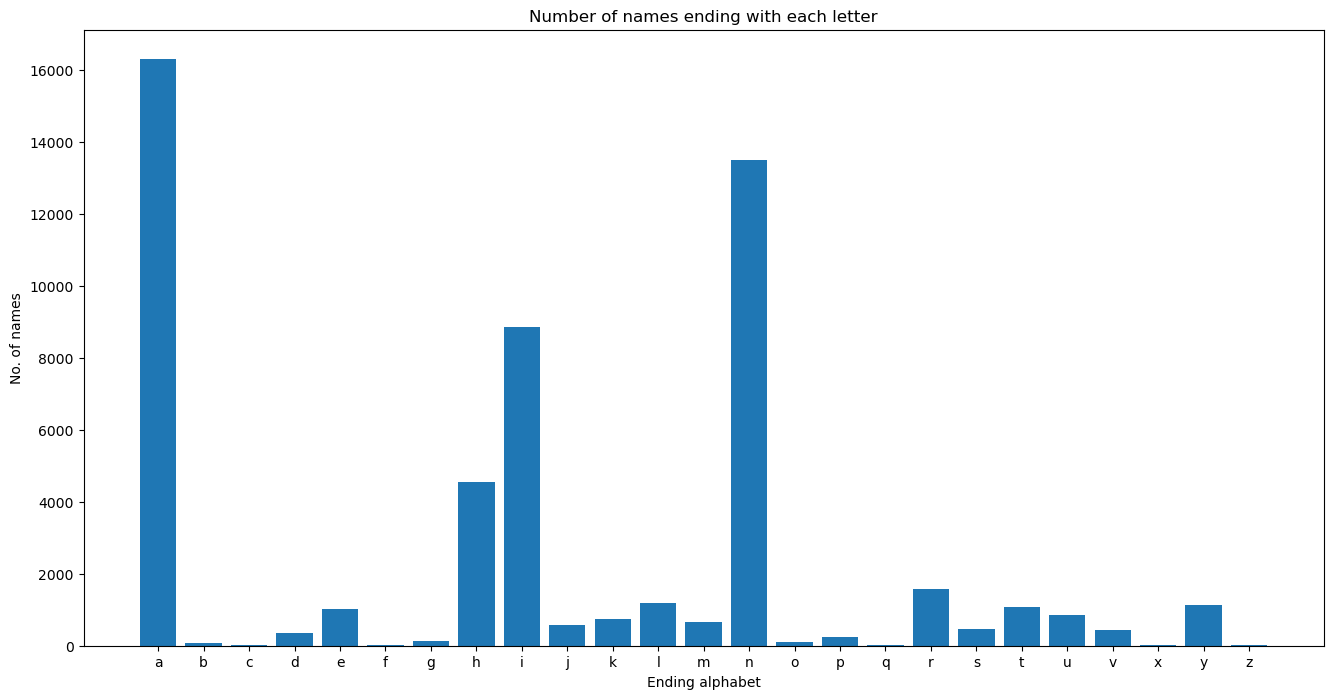

In [453]:
plt.figure(figsize = (16,8))
plt.bar(endletter_count.keys(),endletter_count.values())
plt.xlabel('Ending alphabet')
plt.ylabel('No. of names')
plt.title('Number of names ending with each letter')

Top 5 alphabets with which most of the indian names end are:

In [681]:
# most common ending letter
print('The 5 most name ending letters are : ', *sorted(endletter_count.items(), key=lambda item: item[1])[-5:][::-1])

The 5 most name ending letters are :  ('a', 16311) ('n', 13513) ('i', 8863) ('h', 4551) ('r', 1584)


Let us now build a word cloud of the names present in the dataset

In [455]:
# building a wordcloud
text =  " ".join(i for i in dataset.Name)
word_cloud = WordCloud(
        width=3000,
        height=2000,
        random_state=1,
        background_color="white",
        colormap="BuPu",
        collocations=False,
        stopwords=STOPWORDS,
        ).generate(text)

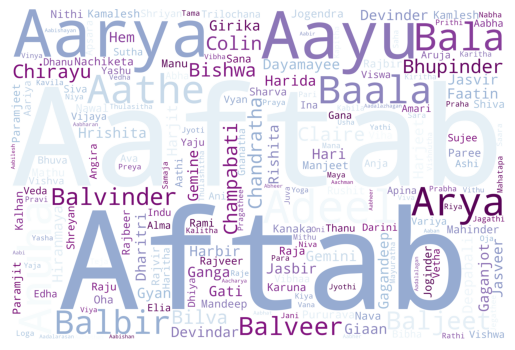

In [456]:
plt.imshow(word_cloud)
plt.axis("off")    
plt.show()

### Building a model

In [457]:
X =list( dataset['Name'])
Y = list(dataset['Gender'])

We encode the 'F' and 'M' labels in the target attribute for easier modeling

In [458]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)

A count vectorizer is used to convert string-type names into array-like data

In [459]:
# count vectorization
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='char')
X=cv.fit_transform(X).toarray()

Splitting the dataset

In [460]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

### 1) Logistic Regression

In [461]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()
LR_model.fit(x_train,y_train)

LogisticRegression()

In [462]:
LR_y_pred = LR_model.predict(x_test)

In [471]:
# Naive Bayes

### 2) Naive Bayes

In [472]:
from sklearn.naive_bayes import MultinomialNB
NB_model = MultinomialNB()
NB_model.fit(x_train,y_train)

MultinomialNB()

In [473]:
NB_y_pred = NB_model.predict(x_test)

### 3) XGBoost

In [479]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [480]:
from xgboost import XGBClassifier()
XGB_model = XGBClassifier(use_label_encoder= False)
XGB_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [569]:
XGB_y_pred = XGB_model.predict(x_test)

### Result Comparison

In [498]:
from sklearn.metrics import confusion_matrix
def cmatrix(model):
    y_pred = model.predict(x_test)
    cmatrix = confusion_matrix(y_test, y_pred)
    print(cmatrix)
    sns.heatmap(cmatrix,fmt='d',cmap='BuPu',annot=True)
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title('Confusion Matrix')

0.7108616334549537
              precision    recall  f1-score   support

           0       0.70      0.66      0.68      8260
           1       0.72      0.75      0.74      9555

    accuracy                           0.71     17815
   macro avg       0.71      0.71      0.71     17815
weighted avg       0.71      0.71      0.71     17815

[[5451 2809]
 [2342 7213]]
None


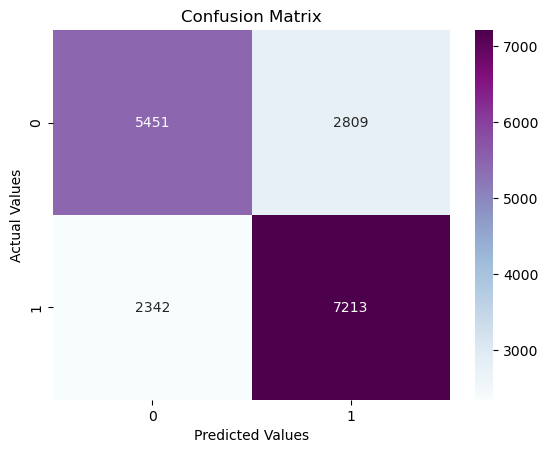

In [682]:
import sklearn.metrics as metrics
print(metrics.accuracy_score(LR_y_pred,y_test))
print(metrics.classification_report(y_test, LR_y_pred))
print(cmatrix(LR_model))

In [683]:
import sklearn.metrics as metrics
print(metrics.accuracy_score(NB_y_pred,y_test))
print(metrics.classification_report(y_test, NB_y_pred))

0.6534942464215548
              precision    recall  f1-score   support

           0       0.65      0.56      0.60      8260
           1       0.66      0.74      0.70      9555

    accuracy                           0.65     17815
   macro avg       0.65      0.65      0.65     17815
weighted avg       0.65      0.65      0.65     17815



[[4604 3656]
 [2517 7038]]


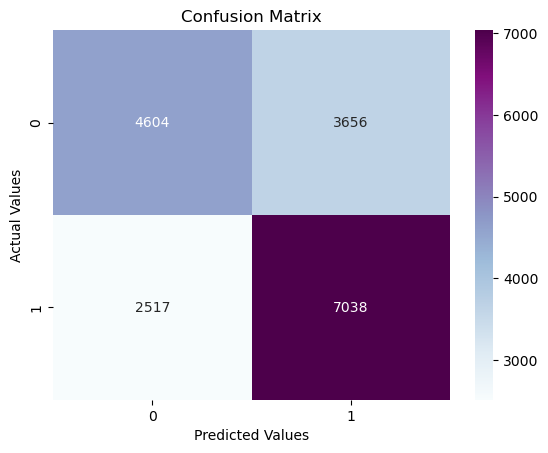

In [500]:
cmatrix(NB_model)

In [685]:
print(metrics.accuracy_score(XGB_y_pred,y_test))
print(metrics.classification_report(y_test,XGB_y_pred))

0.7742913275329778
              precision    recall  f1-score   support

           0       0.81      0.67      0.73      8260
           1       0.75      0.86      0.80      9555

    accuracy                           0.77     17815
   macro avg       0.78      0.77      0.77     17815
weighted avg       0.78      0.77      0.77     17815



[[5977 2283]
 [2060 7495]]


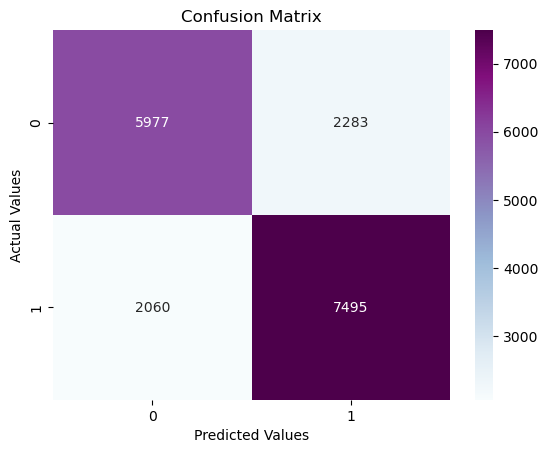

In [501]:
cmatrix(XGB_model)

### 4) LSTM

In [566]:
#LSTM

In [526]:
from tensorflow.keras import models
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from keras.layers import Embedding
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, LeakyReLU
from tensorflow.keras.layers import BatchNormalization, Activation, Conv2D 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Dense, Dropout
from tensorflow.keras.layers import LSTM

In [622]:
max_words = 1000
max_len = 26

Defining the LSTM layers

In [623]:
LSTM_model = Sequential()
LSTM_model.add(Embedding(voc_size,40,input_length=26))
LSTM_model.add(Dropout(0.3))
LSTM_model.add(LSTM(100))
LSTM_model.add(Dropout(0.3))
LSTM_model.add(Dense(64,activation='relu'))
LSTM_model.add(Dropout(0.3))
LSTM_model.add(Dense(1,activation='sigmoid'))
LSTM_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(LSTM_model.summary())

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 26, 40)            200000    
                                                                 
 dropout_14 (Dropout)        (None, 26, 40)            0         
                                                                 
 lstm_6 (LSTM)               (None, 100)               56400     
                                                                 
 dropout_15 (Dropout)        (None, 100)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                6464      
                                                                 
 dropout_16 (Dropout)        (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 1)               

Training the LSTM model

In [624]:
LSTM_model.fit(x_train,y_train,epochs=100,batch_size=64)

Epoch 1/100
566/566 [==============================] - 23s 31ms/step - loss: 0.6657 - accuracy: 0.5870
Epoch 2/100
566/566 [==============================] - 15s 27ms/step - loss: 0.6458 - accuracy: 0.6243
Epoch 3/100
566/566 [==============================] - 15s 27ms/step - loss: 0.6357 - accuracy: 0.6365
Epoch 4/100
566/566 [==============================] - 16s 28ms/step - loss: 0.6252 - accuracy: 0.6513
Epoch 5/100
566/566 [==============================] - 16s 27ms/step - loss: 0.6176 - accuracy: 0.6576
Epoch 6/100
566/566 [==============================] - 17s 29ms/step - loss: 0.6140 - accuracy: 0.6614
Epoch 7/100
566/566 [==============================] - 19s 34ms/step - loss: 0.6095 - accuracy: 0.6652
Epoch 8/100
566/566 [==============================] - 17s 29ms/step - loss: 0.6041 - accuracy: 0.6722
Epoch 9/100
566/566 [==============================] - 19s 33ms/step - loss: 0.6006 - accuracy: 0.6730
Epoch 10/100
566/566 [==============================] - 18s 31ms/step - l

566/566 [==============================] - 15s 27ms/step - loss: 0.3503 - accuracy: 0.8354
Epoch 80/100
566/566 [==============================] - 16s 27ms/step - loss: 0.3447 - accuracy: 0.8370
Epoch 81/100
566/566 [==============================] - 15s 27ms/step - loss: 0.3484 - accuracy: 0.8366
Epoch 82/100
566/566 [==============================] - 16s 28ms/step - loss: 0.3414 - accuracy: 0.8395
Epoch 83/100
566/566 [==============================] - 16s 28ms/step - loss: 0.3406 - accuracy: 0.8400
Epoch 84/100
566/566 [==============================] - 16s 28ms/step - loss: 0.3367 - accuracy: 0.8401
Epoch 85/100
566/566 [==============================] - 15s 26ms/step - loss: 0.3352 - accuracy: 0.8427
Epoch 86/100
566/566 [==============================] - 15s 27ms/step - loss: 0.3311 - accuracy: 0.8438
Epoch 87/100
566/566 [==============================] - 15s 27ms/step - loss: 0.3374 - accuracy: 0.8416
Epoch 88/100
566/566 [==============================] - 15s 27ms/step - loss:

Saving the model

In [626]:
LSTM_model.save('NameGenderClassification.hdf5')

In [659]:
pickle.dump(LSTM_model, open("model.pickle", 'wb'))

INFO:tensorflow:Assets written to: ram://4ec4322c-dc7d-4bac-b27d-619585482ba9/assets


INFO:tensorflow:Assets written to: ram://4ec4322c-dc7d-4bac-b27d-619585482ba9/assets


In [657]:
import pickle
pickle.dump(vectorizer, open("cv.pickle", "wb"))

Making a sample prediction

In [688]:
def predict(name):
    name_samplevector = cv.transform([name]).toarray()
    prediction = LSTM_model.predict([name_samplevector])
    if prediction >=0.5:
        out = 'Male ♂'
    else:
        out = 'Female ♀'
    print(name+' is a '+ out)

In [690]:
predict('Yamini Ane')

1/1 [==============================] - 0s 46ms/step
Yamini Ane is a Female ♀
